# Image Transform Variation


In [1]:
#!pip install lightning 

In [2]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Dataset, Subset
from torch.utils.data import random_split, SubsetRandomSampler
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image

    #the latest environement
    from lightning.pytorch import LightningModule
    from lightning.pytorch import Trainer
    import lightning.pytorch as L
    from lightning.pytorch import LightningDataModule

In [3]:
dir0='/kaggle/input/animal-image-dataset-cats-dogs-and-foxes/Animal Image Dataset-Cats, Dogs, and Foxes'
classes=[]
paths=[]
for dirname, _, filenames in os.walk(dir0):
    for filename in filenames:
        if filename.endswith('.jpg') or filename.endswith('.jpeg') :
            classes+=[dirname.split('/')[-1]]
            paths+=[(os.path.join(dirname, filename))]
image_path=paths[0]

In [4]:
class LogScaleTransform:
    def __call__(self, tensor):
        epsilon = 1e-6
        return torch.log(tensor + epsilon)

class GaussianNoiseTransform:
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * 0.1 
        return tensor + noise   

class Cutout:
    def __init__(self, size=50):
        self.size = size

    def __call__(self, img):
        x = torch.randint(0, img.size(1) - self.size, (1,))
        y = torch.randint(0, img.size(2) - self.size, (1,))
        img[:, x:x+self.size, y:y+self.size] = 0
        return img

class MosaicTransform:
    def __call__(self, img):
        img = transforms.Resize((32, 32))(img)  
        return transforms.Resize((224, 224))(img) 


transform0 = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images

        LogScaleTransform() ,          
        GaussianNoiseTransform(),
        Cutout(size=50),
        MosaicTransform(),

        transforms.RandomRotation(degrees=(-30, 30)),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
        transforms.RandomGrayscale(p=0.2),
        transforms.RandomCrop(size=(200, 200)),
        transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    
        transforms.Resize(112),             # resize shortest side to 112 pixels
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
    
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

## Common Interpolation Methods
    'nearest': No interpolation; displays raw pixel values.
    'bilinear': Linear interpolation.
    'bicubic': Bicubic interpolation.
    'hamming': Hamming interpolation.
    'gaussian': Gaussian interpolation.
    'lanczos': Lanczos resampling.
    'none': No resampling or interpolation; displays the image as-is.

# Normal

(225, 225, 3)


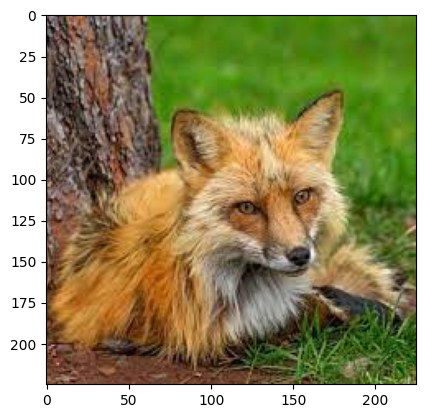

In [5]:
# Open the image
image = Image.open(image_path)

image_array = np.array(image)
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()

# Nomalize

(224, 224, 3)


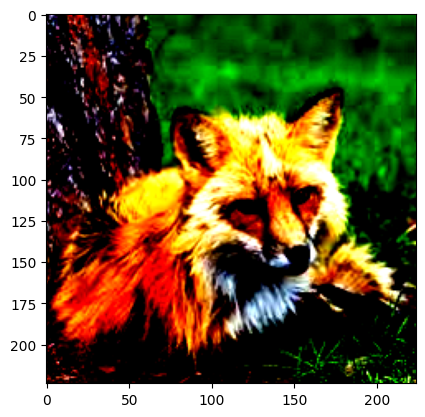

In [6]:
image = Image.open(image_path)

transform1=transforms.Compose([
            transforms.Resize(224),             # resize shortest side to 224 pixels
            transforms.CenterCrop(224),         # crop longest side to 224 pixels at center            
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

image=transform1(image)

image_array = np.array(image)
image_array = np.transpose(image_array, (1, 2, 0)) if image_array.ndim == 3 else image_array
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()

# Grayscale

(225, 225, 3)


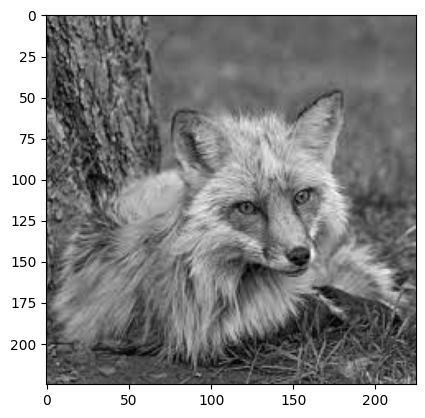

In [7]:
image = Image.open(image_path)

transform1=transforms.Compose([
            transforms.RandomGrayscale(p=1.0),       
            transforms.ToTensor(),
        ])

image=transform1(image)

image_array = np.array(image)
image_array = np.transpose(image_array, (1, 2, 0)) if image_array.ndim == 3 else image_array
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()

# Mosaic

(224, 224, 3)


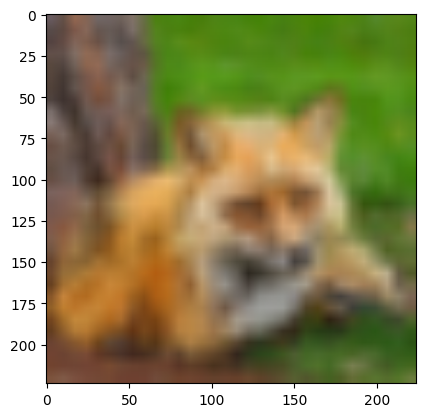

In [8]:
image = Image.open(image_path)

transform1=transforms.Compose([
            MosaicTransform(),     
            transforms.ToTensor(),
        ])

image=transform1(image)

image_array = np.array(image)
image_array = np.transpose(image_array, (1, 2, 0)) if image_array.ndim == 3 else image_array
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()

# LogScale

(224, 224, 3)


/opt/conda/lib/python3.10/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


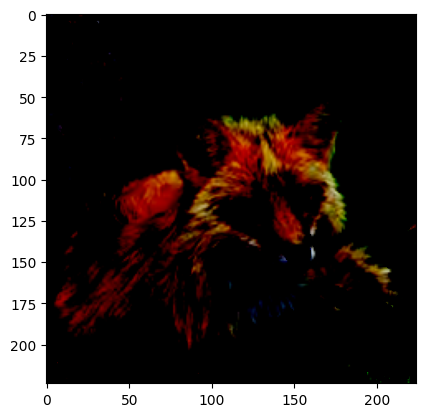

In [9]:
image = Image.open(image_path)

transform1 = transforms.Compose([
    transforms.Resize(224),                
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225]),
    LogScaleTransform()                    
])

image=transform1(image)

image_array = np.array(image)
image_array = np.transpose(image_array, (1, 2, 0)) if image_array.ndim == 3 else image_array
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()

# GaussianNoiseTransform:

(224, 224, 3)


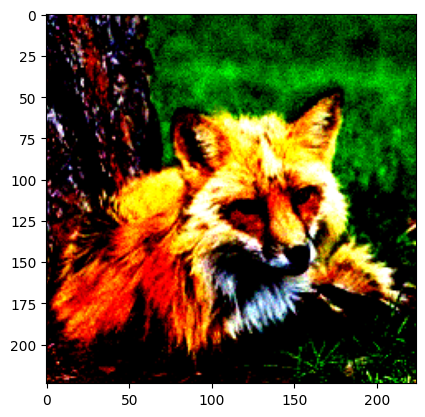

In [10]:
image = Image.open(image_path)

transform1 = transforms.Compose([
    transforms.Resize(224),                
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225]),
    GaussianNoiseTransform()                    
])

image=transform1(image)

image_array = np.array(image)
image_array = np.transpose(image_array, (1, 2, 0)) if image_array.ndim == 3 else image_array
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()

# Cutout

(224, 224, 3)


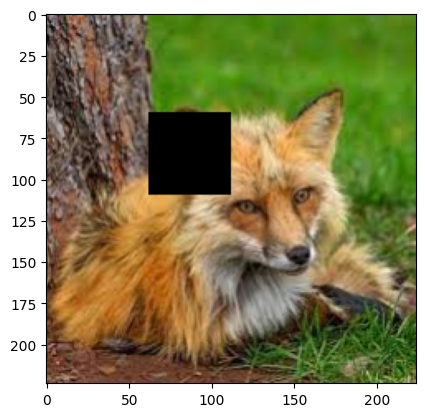

In [11]:
image = Image.open(image_path)

transform1 = transforms.Compose([
    transforms.Resize(224),                
    transforms.ToTensor(),
    Cutout()                    
])

image=transform1(image)

image_array = np.array(image)
image_array = np.transpose(image_array, (1, 2, 0)) if image_array.ndim == 3 else image_array
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()

# RandomPerspective

(224, 224, 3)


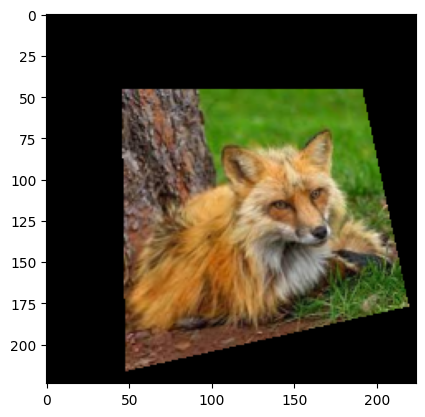

In [12]:
image = Image.open(image_path)

transform1=transforms.Compose([
            transforms.Resize(224),             # resize shortest side to 224 pixels
            transforms.RandomPerspective(distortion_scale=0.5, p=1.0),
            transforms.ToTensor(),
        ])

image=transform1(image)

image_array = np.array(image)
image_array = np.transpose(image_array, (1, 2, 0)) if image_array.ndim == 3 else image_array
print(image_array.shape)

# Display the image
plt.imshow(image_array, interpolation='hamming')
plt.show()